# CS471: Introduction to Artificial Intelligence Assignment 4: Decision Tree Classification
### In this assignment, you will implement the Decision tree classification method using Scikit-learn.
by Zach Smith

In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd

data=load_iris()


In [16]:
data.keys()



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [18]:
data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [19]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Include a basic description of the data (what are the features and labels) (1 point)
### Write in your own words of what the classification task is and why a decision tree is a reasonable model to try for this data. (1 point)
We can see from the data that our featuers are sepal length, sepal width, petal length and, petal width; all measured in cm.
Our labels, aka our outputs, are either: setosa, versicolor, or virginica.
Our classification task is to determine the species of an iris given the above four predictive attributes
A decision tree is a reasonable model to try for this dataset because. A decsion tree makes a statement, and then makes a decision based on wherether the statement was true or false. Decision tree classifier is easy to explain and it can hanlde qualitative predictors with simplicity.We are trying to classify these flowers with discrete outcomes so this makes a decision tree a good model to try.

In [22]:
df=pd.DataFrame(data['data'], columns=data['feature_names'])

In [23]:
df['target']=data['target']

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
# We are spliting data in to training data(70%), validation(10%), and testing (20%)
train_df=df[:105]
val_df=df[105:120]
test_df=df[120:]

[Text(0.3333333333333333, 0.875, 'petal length (cm) <= 2.45\ngini = 0.544\nsamples = 105\nvalue = [50, 50, 5]\nclass = setosa'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal length (cm) <= 5.05\ngini = 0.165\nsamples = 55\nvalue = [0, 50, 5]\nclass = versicolor'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 49\nvalue = [0, 49, 0]\nclass = versicolor'),
 Text(0.6666666666666666, 0.375, 'petal width (cm) <= 1.7\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]\nclass = virginica'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = virginica')]

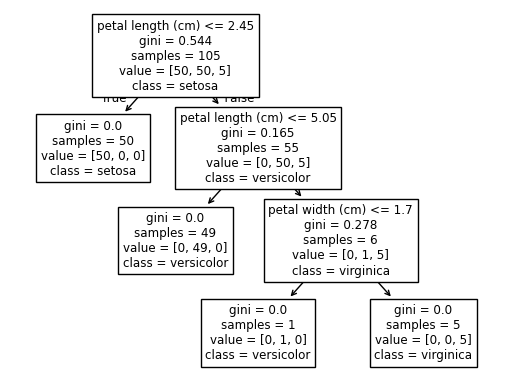

In [43]:
train_df.columns
X=train_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
Y=train_df['target']
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X,Y)

tree.plot_tree(clf,feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],class_names=['setosa', 'versicolor', 'virginica'])

In [ ]:
clf.predict()